### Training RNN model

The following code is designed to train 32 different models by combination of different pre-processing methods. The order of the below processes reflects the order of the preprocessing methods.
<list>
- Expansion of contractions
- Basic preprocessing
- Grammar correction
- Simplification of negations
- Lemmatization
- Removal of stop words

#### Imports

In [ ]:
import imports as ii
import functions as f
import preprocessing as pp
import neuralnetworks as nn
import trainRNN as trainRNN

#### Read-in the datasets

In [4]:
PATH = {}
PATH["dataset_classification"] = "dataset/classification/"
PATH["dataset_labeling"] = "dataset/seq_labeling/"
PATH["music_reviews_train"] = PATH["dataset_classification"] + "music_reviews_train.json.gz"
PATH["music_reviews_dev"] = PATH["dataset_classification"] + "music_reviews_dev.json.gz"
PATH["music_reviews_test"] = PATH["dataset_classification"] + "music_reviews_test.json.gz"
train = f.readJson(PATH["music_reviews_train"])
test = f.readJson(PATH["music_reviews_dev"])

Number of data:  100000
Number of data:  10000


#### Define features of training

Below variables defining:
<list>
- leng = how many sentence will be used for the training
- maxlen = maximum length of words in each sentences both in the training and test data

In [31]:
leng = 5000
maxlen = 40

In [32]:
# read in train and test data

X_train, y_train, train_idx, train_missing_idx = f.json_divide(train)
X_test, y_test, test_idx, test_missing_idx = f.json_divide(test)

# convert labels

sent_dict = {"positive": 1, "negative": 0}
y_train = pp.sentiment_converter(y_train, sent_dict)
y_test = pp.sentiment_converter(y_test, sent_dict)

# sampling

start = 6666 # just a number

X_train = X_train[start:start+leng]
y_train = y_train[start:start+leng]


#### Grid search & Training
Below code generating 32 combinations of each preprocessing methods on the train and test set. The structure of the generated datasets is:
<list> 
- data_sets[0] - First preprocessing combination
- data_set[0][0] - Labels array of the combinations. For instance:  [0,1,0,0,0,0] meaning only the basic pre-processing was applied, the rest was not
- data_sets[0][1] - Preprocessed Train set
- datasets[0][2] - Preprocessed Dev set
    
</list>

It's running for a while since it is generating a relatively huge set

In [29]:
data_sets, y_train, y_test = f.grid_search(X_train, X_test, y_train, y_test)

#### Ratio of fully catched sentences
Basic statistics about the ratio of sentencies which were fully catched with the given maximum sentence length variable

In [ ]:
f.statistics_sets_sizes(data_sets, max_len=maxlen)

### Training the LSTM model
Training and evaulation takes around one hour with 5000 sentences

In [ ]:
trainRNN.trainRNN(data_sets, y_train, y_test, early_stop_patience=2, filename="dummy", maxlen=maxlen)

### Re-training an LSTM model
The code below is written for train a model with a given pre-process combination or combinations. 

Combinations:  [0, 1, 0, 0, 1, 0]
Epoch 1/10
1200/1200 [==============================] - 110s 91ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 108s 90ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 113s 94ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 2.0000e-04
Epoch 3: early stopping


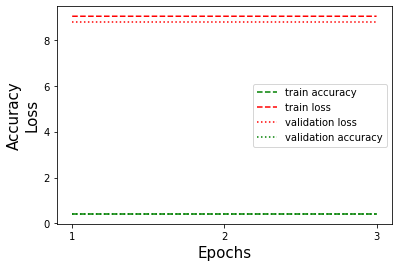

Combinations were checked
Combinations:  [0, 1, 1, 0, 1, 0]
Epoch 1/10
1200/1200 [==============================] - 89s 73ms/step - loss: 0.4759 - accuracy: 0.7799 - val_loss: 0.3408 - val_accuracy: 0.8581 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2681 - accuracy: 0.9013
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 93s 78ms/step - loss: 0.2681 - accuracy: 0.9013 - val_loss: 0.3356 - val_accuracy: 0.8749 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1720 - accuracy: 0.9415
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 93s 77ms/step - loss: 0.1720 - accuracy: 0.9415 - val_loss: 0.3308 - val_accuracy: 0.8747 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1499 - accuracy: 0.9504
Epoch 4: ReduceLROnPlateau reduci

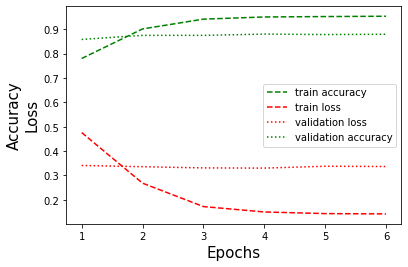

Combinations were checked
Combinations:  [0, 1, 1, 1, 1, 0]
Epoch 1/10
1200/1200 [==============================] - 95s 78ms/step - loss: 0.4499 - accuracy: 0.8090 - val_loss: 0.3329 - val_accuracy: 0.8681 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2689 - accuracy: 0.9048
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 91s 75ms/step - loss: 0.2689 - accuracy: 0.9048 - val_loss: 0.3247 - val_accuracy: 0.8725 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1889 - accuracy: 0.9400
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 89s 74ms/step - loss: 0.1889 - accuracy: 0.9400 - val_loss: 0.3232 - val_accuracy: 0.8824 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1514 - accuracy: 0.9510
Epoch 4: ReduceLROnPlateau reduci

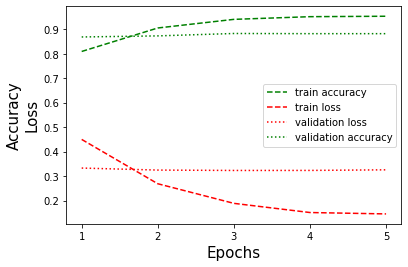

Combinations were checked
Combinations:  [0, 1, 0, 1, 1, 0]
Epoch 1/10
1200/1200 [==============================] - 107s 87ms/step - loss: 0.4892 - accuracy: 0.7709 - val_loss: 0.3809 - val_accuracy: 0.8403 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2843 - accuracy: 0.8961
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 103s 86ms/step - loss: 0.2843 - accuracy: 0.8961 - val_loss: 0.3458 - val_accuracy: 0.8674 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1911 - accuracy: 0.9372
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 104s 87ms/step - loss: 0.1911 - accuracy: 0.9372 - val_loss: 0.3526 - val_accuracy: 0.8717 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1663 - accuracy: 0.9478
Epoch 4: ReduceLROnPlateau red

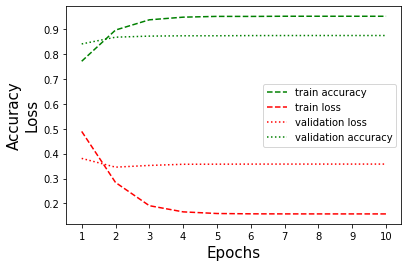

Combinations were checked
Combinations:  [1, 1, 1, 1, 1, 0]
Epoch 1/10
1200/1200 [==============================] - 89s 73ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 87s 73ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 86s 72ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 2.0000e-04
Epoch 3: early stopping


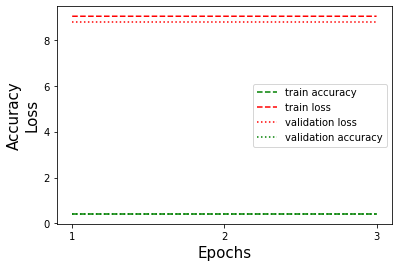

Combinations were checked
Combinations:  [1, 1, 0, 0, 1, 0]
Epoch 1/10
1200/1200 [==============================] - 105s 86ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 105s 87ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 104s 87ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 2.0000e-04
Epoch 3: early stopping


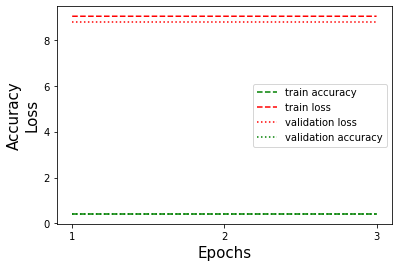

Combinations were checked
Combinations:  [1, 1, 1, 0, 1, 0]
Epoch 1/10
1200/1200 [==============================] - 89s 73ms/step - loss: 5.2467 - accuracy: 0.5297 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 88s 73ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 89s 74ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 2.0000e-04
Epoch 3: early stopping


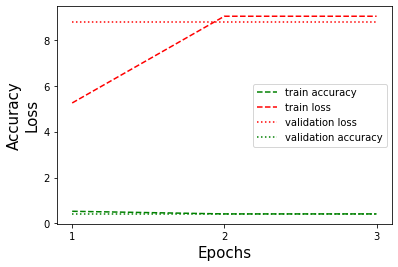

Combinations were checked
Combinations:  [1, 1, 0, 1, 1, 0]
Epoch 1/10
1200/1200 [==============================] - 107s 88ms/step - loss: 0.4410 - accuracy: 0.7988 - val_loss: 0.3236 - val_accuracy: 0.8752 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2530 - accuracy: 0.9115
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 117s 98ms/step - loss: 0.2530 - accuracy: 0.9115 - val_loss: 0.3048 - val_accuracy: 0.8822 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1623 - accuracy: 0.9497
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 115s 96ms/step - loss: 0.1623 - accuracy: 0.9497 - val_loss: 0.3112 - val_accuracy: 0.8902 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.1311 - accuracy: 0.9596
Epoch 4: ReduceLROnPlateau red

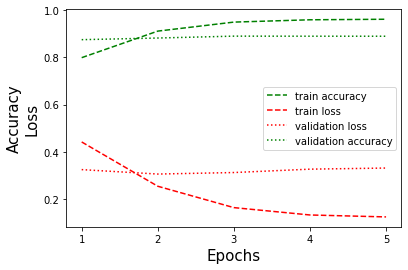

Combinations were checked
Combinations:  [0, 1, 0, 1, 1, 1]
Epoch 1/10
1200/1200 [==============================] - 118s 97ms/step - loss: 0.7243 - accuracy: 0.6506 - val_loss: 0.4546 - val_accuracy: 0.8123 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 0.4406 - accuracy: 0.8010
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 114s 95ms/step - loss: 0.4406 - accuracy: 0.8010 - val_loss: 0.4608 - val_accuracy: 0.8352 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.3553 - accuracy: 0.8559
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 113s 94ms/step - loss: 0.3553 - accuracy: 0.8559 - val_loss: 0.4304 - val_accuracy: 0.8502 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.3094 - accuracy: 0.8991
Epoch 4: ReduceLROnPlateau red

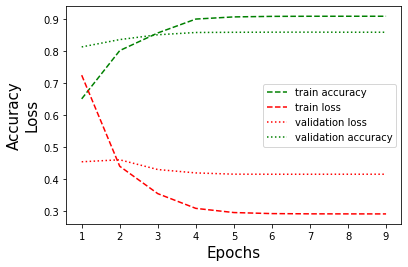

Combinations were checked
Combinations:  [0, 1, 0, 0, 1, 1]
Epoch 1/10
1200/1200 [==============================] - 142s 117ms/step - loss: 0.4409 - accuracy: 0.8077 - val_loss: 0.3187 - val_accuracy: 0.8746 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 123s 102ms/step - loss: 0.2542 - accuracy: 0.9095 - val_loss: 0.3361 - val_accuracy: 0.8707 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - 117s 97ms/step - loss: 0.2112 - accuracy: 0.9323 - val_loss: 0.6321 - val_accuracy: 0.8622 - lr: 0.0010
Epoch 3: early stopping


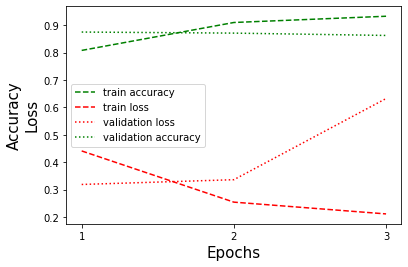

Combinations were checked
Combinations:  [1, 1, 0, 0, 1, 1]
Epoch 1/10
1200/1200 [==============================] - 118s 97ms/step - loss: 0.6794 - accuracy: 0.6454 - val_loss: 0.9547 - val_accuracy: 0.6977 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 1.5592 - accuracy: 0.7742
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 121s 101ms/step - loss: 1.5592 - accuracy: 0.7742 - val_loss: 1.4571 - val_accuracy: 0.7240 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 1.5526 - accuracy: 0.7602
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 128s 106ms/step - loss: 1.5526 - accuracy: 0.7602 - val_loss: 1.6108 - val_accuracy: 0.7427 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 1.7329 - accuracy: 0.7842
Epoch 4: ReduceLROnPlateau r

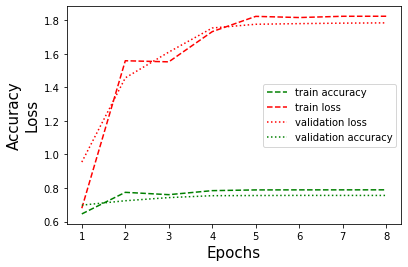

Combinations were checked
Combinations:  [1, 1, 0, 1, 1, 1]
Epoch 1/10
1200/1200 [==============================] - 112s 92ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 120s 100ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 109s 90ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 2.0000e-04
Epoch 3: early stopping


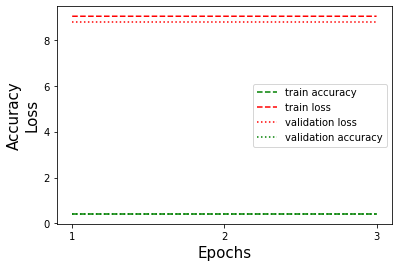

Combinations were checked
Combinations:  [0, 1, 1, 1, 1, 1]
Epoch 1/10
1200/1200 [==============================] - 96s 79ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 93s 78ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 93s 78ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 2.0000e-04
Epoch 3: early stopping


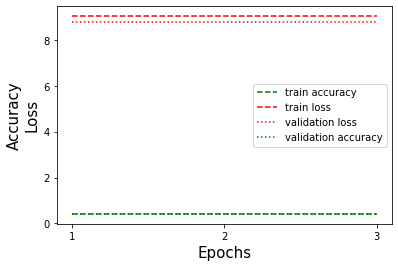

Combinations were checked
Combinations:  [0, 1, 1, 0, 1, 1]
Epoch 1/10
1200/1200 [==============================] - 97s 80ms/step - loss: 0.7236 - accuracy: 0.6315 - val_loss: 0.8750 - val_accuracy: 0.6337 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - 99s 83ms/step - loss: 0.7670 - accuracy: 0.6507 - val_loss: 0.7474 - val_accuracy: 0.6129 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.5135 - accuracy: 0.7568
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 103s 86ms/step - loss: 0.5135 - accuracy: 0.7568 - val_loss: 0.4117 - val_accuracy: 0.8409 - lr: 0.0010
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.2734 - accuracy: 0.8999
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 97s 80ms/step - loss: 0.2734 - accuracy: 0.8999 - val_loss: 0.3717 - val_accur

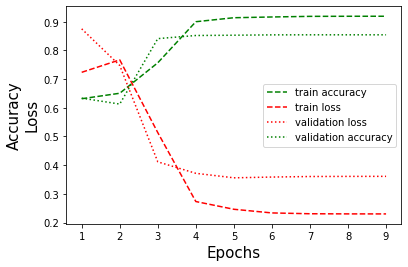

Combinations were checked
Combinations:  [1, 1, 1, 0, 1, 1]
Epoch 1/10
1200/1200 [==============================] - 100s 81ms/step - loss: 1.1242 - accuracy: 0.7117 - val_loss: 4.4639 - val_accuracy: 0.7002 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 2.8775 - accuracy: 0.6563
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 98s 81ms/step - loss: 2.8775 - accuracy: 0.6563 - val_loss: 0.5291 - val_accuracy: 0.7804 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 0.8682 - accuracy: 0.7766
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 97s 81ms/step - loss: 0.8682 - accuracy: 0.7766 - val_loss: 0.5148 - val_accuracy: 0.8046 - lr: 2.0000e-04
Epoch 4/10
1200/1200 [==============================] - ETA: 0s - loss: 0.4384 - accuracy: 0.8364
Epoch 4: ReduceLROnPlateau reduc

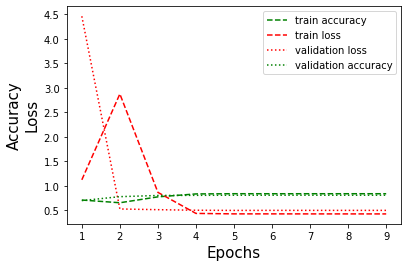

Combinations were checked
Combinations:  [1, 1, 1, 1, 1, 1]
Epoch 1/10
1200/1200 [==============================] - 93s 77ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 2/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1200/1200 [==============================] - 89s 74ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 0.0010
Epoch 3/10
1200/1200 [==============================] - ETA: 0s - loss: 9.0231 - accuracy: 0.4150
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1200/1200 [==============================] - 88s 74ms/step - loss: 9.0231 - accuracy: 0.4150 - val_loss: 8.7664 - val_accuracy: 0.4317 - lr: 2.0000e-04
Epoch 3: early stopping


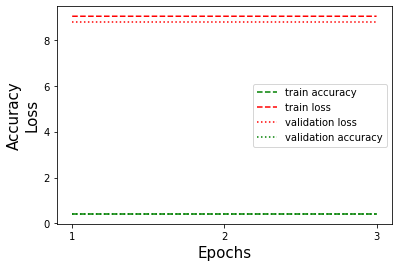

Combinations were checked


In [20]:
# define combinations
combination = [[0, 1, 0, 0, 0, 0],
[1, 1, 1, 1, 1, 1]
]

# name of the file which will contain the LOGS
filename = "retraining"

# early stopping criteria - max 10! 
early_stop_patience = 2

for comb in combination:
    data_sets, y_train, y_test = f.grid_search_retrain(X_train, X_test, y_train, y_test, comb)
    trainRNN.trainRNN(data_sets, y_train, y_test, early_stop_patience=early_stop_patience, filename=filename, maxlen=maxlen)